# 本周内容：分进合击进阶分析策略
1. 数据透视：pivot,pivot_table系统
2. 数据重塑：reshape
3. 数据框排序： sort_values,sori_index
4. 数据表从长到宽

## 本周知识点主要在二维项度上，以“类别”分进，以“数量”合击，主要内容包括：
1. 分进合击进阶分析策略
   * 什么是pivot,pivot_table,cross_tab数据透序表
2. 复习分进合击的心法以及剑法学习
   * 区分变量性质(variable types)/数据形态(data types)
   * 分进多为“类别”，可以是定类或定序
   * 合击常为“数量”，可以是定距或定比
3. 二维项度的设定决定及规划
   * 使用nuninque预判生成较宽表格的大小
   * 多层次下的较复杂排序
   * 数据框“长”“宽”的使用差异

In [3]:
import pandas as pd

In [7]:
# 分进合击初阶分析策略，使用groupby agg
df = pd.read_csv("20春_pandas_week02_hurun_unicorn.tsv",encoding = "utf8",sep = "\t")
data_初阶 = df.groupby(by = ["国家","成立年份"]).agg({"估值（亿人民币）":"sum"})
data_初阶
# 此时的数据只有一行

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
    2005       300
    2006      2380
    2007      1280
    2008       710
    2009       950
    2010      1590
    2011      6570
    2012     11330
    2013      5340
    2014     16150
    2015      3960
    2016      1300
    2017       810
    2018      1090
    2019       100
以色列 2002       150
    2010       210
    2011       150
    2012       150
    2013        70
卢森堡 2014        70
印度  2000       150
    2004       150
    2007        70
    2008       840
...            ...
美国  2006       810
    2007      2650
    2008      4570
    2009      2090
    2010      6150
    2011      2620
    2012      4670
    2013      3840
    2014      2220
    2015      5980
    2016      1690
    2017       870
    2019        70
芬兰  2016        70
英国  2004       350
    2005       150
    2009        70
    2011       550
    2012       450
    2013       350
    2015       350
    2016       150
菲律宾 2015        70
西班牙 2011        70
阿根廷 2013        70
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

In [18]:
# 分进合击进阶分析策略，使用groupby agg pivot
data_进阶_pv = df.groupby(by=["国家","成立年份"]) \
                 .agg({"估值（亿人民币）":"sum"}) \
                 .reset_index() \
                 .set_index("国家") \
                 .pivot(columns="成立年份",values="估值（亿人民币）")
print(data_进阶_pv.shape)
data_进阶_pv

(24, 20)


成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### set_index 和 reset_index 
1. set_index 可以设置单索引和复合索引，其参数append添加新索引
2. reset_index 可以还原索引，重新变为默认为整型索引，即进行默认索引，取消groupby分组，将组别变成普通的列。其参数level控制了具体要还原的那个等级的索引

In [20]:
data_进阶_pv.reset_index()

成立年份,国家,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,...,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
1,以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
2,卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
3,印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,...,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
4,印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
6,巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
7,德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
8,新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,日本,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,NaN


In [21]:
# 分进合击进阶分析策略，使用pivot_table
data_进阶_pv_table = df.pivot_table(index="国家",columns="成立年份", \
                        values = "估值（亿人民币）",aggfunc="sum")
print(data_进阶_pv_table.shape)
data_进阶_pv_table

(24, 20)


成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. 什么是透视表？
透视表是一种对数据动态排布并且分类汇总的表格格式，在pandas中它被称为pivot_table
### 2. 每个pivot_table必须拥有一个index
### 3. values可以对需要计算的数据进行筛选
### 4. aggfunc参数可以设置我们对数据聚合时进行的函数操作
### 5. columns类似index，可以设置列层次字段，它不是必要参数，但可以做为一种分割数据的可选方式
   * fill_value填充空值，margins=True进行汇总
   * aggfunc也可以使用dict类型，如果dict中的内容与values不匹配时，以dict中为准
   
### 6.  pivot和pivot_table的区别
   * pivot重点在于reshape，就是合并同类项。在行与列的交叉点值的索引应该是唯一值，不是唯一值就会报错，尽量使用pivot_table，可以避免这个问题
   * 在调用pivot函数之前，必须确保我们指定的列和行没有重复的数据，如果无法确定，可以使用pivot_table
   * 实际上，pivot_table是pivot的泛化，它允许在数据集中聚合具有相同目标的多个值

In [30]:
# 分进合击进阶 pivot_table,按总值排序
# sort_values
排序 = data_进阶_pv_table.sum(axis=1).sort_values(ascending=False).index
排序

Index(['中国', '美国', '印度', '英国', '印度尼西亚', '韩国', '新加坡', '德国', '以色列', '瑞士', '巴西',
       '瑞典', '法国', '日本', '澳大利亚', '爱尔兰', '马耳他', '爱沙尼亚', '芬兰', '哥伦比亚', '菲律宾',
       '西班牙', '卢森堡', '阿根廷'],
      dtype='object', name='国家')

In [31]:
排序_总值 = data_进阶_pv_table.sum(axis = 1).sort_values(ascending=False).index
排序_总值

Index(['中国', '美国', '印度', '英国', '印度尼西亚', '韩国', '新加坡', '德国', '以色列', '瑞士', '巴西',
       '瑞典', '法国', '日本', '澳大利亚', '爱尔兰', '马耳他', '爱沙尼亚', '芬兰', '哥伦比亚', '菲律宾',
       '西班牙', '卢森堡', '阿根廷'],
      dtype='object', name='国家')

In [32]:
分进合击进阶_排序 = data_进阶_pv_table.loc[排序]
分进合击进阶_排序

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
美国,210.0,210.0,6270.0,420.0,1550.0,840.0,810.0,2650.0,4570.0,2090.0,6150.0,2620.0,4670.0,3840.0,2220.0,5980.0,1690.0,870.0,NaN,70.0
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
英国,NaN,NaN,NaN,NaN,350.0,150.0,NaN,NaN,NaN,70.0,NaN,550.0,450.0,350.0,NaN,350.0,150.0,NaN,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
韩国,NaN,NaN,NaN,NaN,NaN,70.0,NaN,350.0,NaN,NaN,670.0,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
分进合击进阶_排序['总值'] = 排序_总值
分进合击进阶_排序

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,总值
国家,,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,...,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0,中国
美国,210.0,210.0,6270.0,420.0,1550.0,840.0,810.0,2650.0,4570.0,2090.0,...,2620.0,4670.0,3840.0,2220.0,5980.0,1690.0,870.0,NaN,70.0,美国
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,...,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN,印度
英国,NaN,NaN,NaN,NaN,350.0,150.0,NaN,NaN,NaN,70.0,...,550.0,450.0,350.0,NaN,350.0,150.0,NaN,NaN,NaN,英国
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,...,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,印度尼西亚
韩国,NaN,NaN,NaN,NaN,NaN,70.0,NaN,350.0,NaN,NaN,...,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,韩国
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,新加坡
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,...,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN,德国
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,以色列


In [35]:
# 数据框排序 按列索引进行排序 sort_index,axis=0
data_进阶_pv_table.sort_index(axis=0,ascending=True)

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# sort_index,axis=1
data_进阶_pv_table.sort_index(axis=1,ascending=True)

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
国家,,,,,,,,,,,,,,,,,,,,
中国,170.0,170.0,200.0,200.0,100.0,300.0,2380.0,1280.0,710.0,950.0,1590.0,6570.0,11330.0,5340.0,16150.0,3960.0,1300.0,810.0,1090.0,100.0
以色列,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,150.0,150.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
卢森堡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
印度,150.0,NaN,NaN,NaN,150.0,NaN,NaN,70.0,840.0,NaN,1300.0,440.0,140.0,350.0,270.0,NaN,70.0,70.0,NaN,NaN
印度尼西亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,700.0,70.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哥伦比亚,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN
巴西,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,70.0,370.0,NaN,NaN,NaN,NaN,NaN,NaN
德国,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,370.0,200.0,70.0,NaN,NaN,NaN,NaN,NaN
新加坡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# sort_values 参数说明
# axis =0 表示纵轴，方向从上到下
# axis =1 表示横轴，方向从左到右。数组的变化是横向的，而体现出来的是列的增加或减少
# ascending 是否按指定列的数组升序排列，默认为True，即升序排列
# inplace 是否用排序后的数据集替换原来的数据，默认为False，即不替换

In [46]:
data_初阶.reset_index()

,国家,成立年份,估值（亿人民币）
0,中国,2000,170
1,中国,2001,170
2,中国,2002,200
3,中国,2003,200
4,中国,2004,100
5,中国,2005,300
6,中国,2006,2380
7,中国,2007,1280
8,中国,2008,710
9,中国,2009,950


In [50]:
city = df.groupby(by=["国家","企业名称"]).agg({"估值（亿人民币）":"sum"})
city

估值（亿人民币）
国家  企业名称                                  
中国  1919酒类直供                            70
    58到家                                70
    APUS                               150
    Block.One                          150
    DotC United                         70
    G7                                  70
    Momenta                             70
    PingPong                           150
    SheIn                              100
    VIPKID                             200
    V领地                                 70
    WeLab                               70
    一下科技                               200
    一点资讯                                70
    一起作业                                70
    丁香园                                 70
    万能钥匙                                70
    丰巢科技                                70
    九次方大数据                              70
    云从科技                               200
    云知声                                 70
    云鸟科技                                70
    京东健康                               100
    京东数科                              1300
    京东物流                               800
    人人贷                                 70
    人人车                                 70
    亿邦国际                               100
    企鹅杏仁                                70
    优刻得                                 70
...                                    ...
美国  letgo                               70
    reddit                             200
    sweetgreen                          70
    图森未来                                70
    小马智行                               150
    爱彼迎                               2700
芬兰  HMD                                 70
英国  BenevolentAI                       150
    Checkout.com                       150
    Deliveroo                          150
    Graphcore                          150
    Greensill                          250
    Improbable                         150
    Monzo                              200
    OakNorth                           200
    Ovo Energy                          70
    Oxford Nanopore Technologies       150
    Revolut                            150
    The Hut Group                      350
    TransferWise                       300
菲律宾 Revolution Precrafted               70
西班牙 Cabify                              70
阿根廷 Auth0                               70
韩国  Bluehole                           350
    Coupang                            600
    TMON                                70
    Toss                                70
    Woowa Brothers                     200
    Yanolja                             70
马耳他 Binance                            150

[494 rows x 1 columns]

In [51]:
pivot_city = city.reset_index().pivot(index="企业名称",columns="国家",values="估值（亿人民币）")
pivot_city

国家,中国,以色列,卢森堡,印度,印度尼西亚,哥伦比亚,巴西,德国,新加坡,日本,...,瑞典,瑞士,美国,芬兰,英国,菲律宾,西班牙,阿根廷,韩国,马耳他
企业名称,,,,,,,,,,,,,,,,,,,,,
10X Genomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919酒类直供,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23andMe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58到家,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APUS,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actifio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affirm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afiniti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
pivot_table_city = city.reset_index().pivot_table(index="企业名称",columns="国家",values="估值（亿人民币）",aggfunc="sum")
pivot_table_city
# pivot_table 比 pivot 多func运算

国家,中国,以色列,卢森堡,印度,印度尼西亚,哥伦比亚,巴西,德国,新加坡,日本,...,瑞典,瑞士,美国,芬兰,英国,菲律宾,西班牙,阿根廷,韩国,马耳他
企业名称,,,,,,,,,,,,,,,,,,,,,
10X Genomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919酒类直供,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23andMe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58到家,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APUS,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actifio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affirm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afiniti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


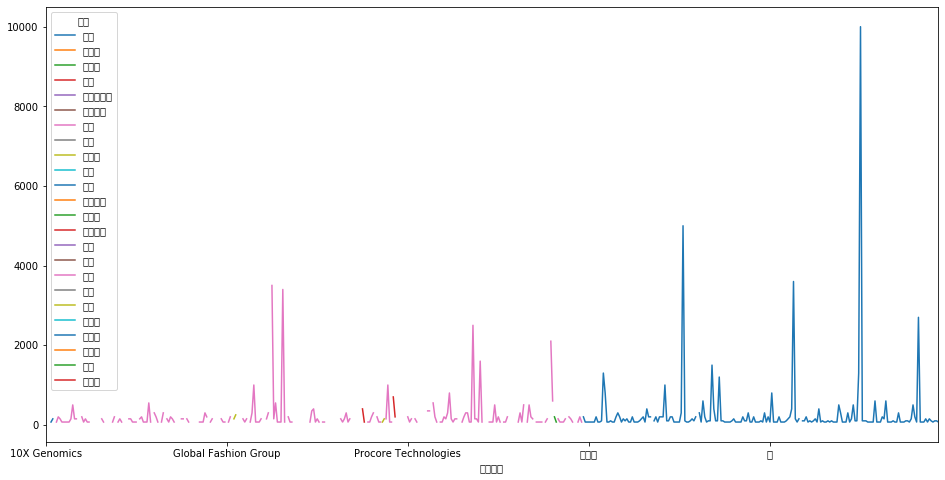

In [56]:
# 可视化 plot
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["Songti SC"]
pivot_city.plot(figsize=(16,8))

In [57]:
df.groupby(by=["国家","成立年份"]).agg({"估值（亿人民币）":sum}).fillna(0)

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
    2005       300
    2006      2380
    2007      1280
    2008       710
    2009       950
    2010      1590
    2011      6570
    2012     11330
    2013      5340
    2014     16150
    2015      3960
    2016      1300
    2017       810
    2018      1090
    2019       100
以色列 2002       150
    2010       210
    2011       150
    2012       150
    2013        70
卢森堡 2014        70
印度  2000       150
    2004       150
    2007        70
    2008       840
...            ...
美国  2006       810
    2007      2650
    2008      4570
    2009      2090
    2010      6150
    2011      2620
    2012      4670
    2013      3840
    2014      2220
    2015      5980
    2016      1690
    2017       870
    2019        70
芬兰  2016        70
英国  2004       350
    2005       150
    2009        70
    2011       550
    2012       450
    2013       350
    2015       350
    2016       150
菲律宾 2015        70
西班牙 2011        70
阿根廷 2013        70
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

In [58]:
df.groupby(["国家","成立年份"])[["估值（亿人民币）"]].sum()

估值（亿人民币）
国家  成立年份          
中国  2000       170
    2001       170
    2002       200
    2003       200
    2004       100
    2005       300
    2006      2380
    2007      1280
    2008       710
    2009       950
    2010      1590
    2011      6570
    2012     11330
    2013      5340
    2014     16150
    2015      3960
    2016      1300
    2017       810
    2018      1090
    2019       100
以色列 2002       150
    2010       210
    2011       150
    2012       150
    2013        70
卢森堡 2014        70
印度  2000       150
    2004       150
    2007        70
    2008       840
...            ...
美国  2006       810
    2007      2650
    2008      4570
    2009      2090
    2010      6150
    2011      2620
    2012      4670
    2013      3840
    2014      2220
    2015      5980
    2016      1690
    2017       870
    2019        70
芬兰  2016        70
英国  2004       350
    2005       150
    2009        70
    2011       550
    2012       450
    2013       350
    2015       350
    2016       150
菲律宾 2015        70
西班牙 2011        70
阿根廷 2013        70
韩国  2005        70
    2007       350
    2010       670
    2011       270
马耳他 2017       150

[100 rows x 1 columns]

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27602 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19969 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39321 missing from cur

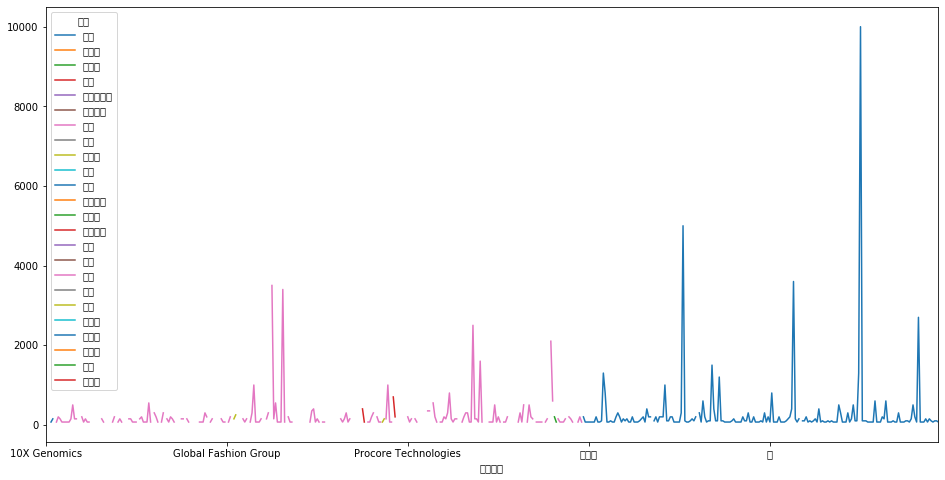

In [60]:
%matplotlib --list
pivot_table_city.plot(figsize=(16,8))

## 练习：按照年份，讲不同行业的估值趋势进行描述

In [65]:
# 初阶方法
data_exc = df.groupby(by=["行业","成立年份"]).agg({"估值（亿人民币）":"sum"})
data_exc

估值（亿人民币）
行业      成立年份          
3D印刷    2011        70
        2013       150
        2015       150
云计算     2000       290
        2001        70
        2002      3500
        2003       150
        2005        70
        2008       290
        2009       360
        2010       360
        2011       670
        2012       880
        2013       650
        2014       540
        2015       370
人工智能    2003       200
        2004       150
        2005       570
        2006       150
        2007        70
        2009       320
        2010        70
        2011       440
        2012       360
        2013       440
        2014      1070
        2015       610
        2016      1310
健康科技    2000        70
...                ...
虚拟与增强现实 2010       300
        2011       400
        2012        70
软件与服务   2001       100
        2002       150
        2005       100
        2007       210
        2008       100
        2009       140
        2010       150
        2011        70
        2012       320
        2013       340
        2014       360
金融科技    2000       220
        2002       200
        2005       300
        2006       640
        2007       300
        2008       220
        2009       210
        2010      2520
        2011      4040
        2012       990
        2013      2910
        2014     11570
        2015      1290
        2016       210
        2017       200
        2018       200

[212 rows x 1 columns]

In [66]:
# 进阶：pivot
data_pivot = data_exc.reset_index().pivot(index="行业",columns="成立年份",values="估值（亿人民币）")
data_pivot

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
行业,,,,,,,,,,,,,,,,,,,,
3D印刷,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,NaN,150.0,NaN,NaN,NaN,NaN
云计算,290.0,70.0,3500.0,150.0,NaN,70.0,NaN,NaN,290.0,360.0,360.0,670.0,880.0,650.0,540.0,370.0,NaN,NaN,NaN,NaN
人工智能,NaN,NaN,NaN,200.0,150.0,570.0,150.0,70.0,NaN,320.0,70.0,440.0,360.0,440.0,1070.0,610.0,1310.0,NaN,NaN,NaN
健康科技,70.0,70.0,NaN,NaN,NaN,NaN,70.0,220.0,70.0,250.0,850.0,410.0,340.0,340.0,NaN,140.0,600.0,150.0,70.0,100.0
共享经济,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,2700.0,70.0,3200.0,170.0,4600.0,420.0,NaN,1270.0,270.0,370.0,NaN,NaN
区块链,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,900.0,1300.0,70.0,150.0,NaN,300.0,NaN,NaN
即时通讯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,150.0,70.0,220.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN
大数据,NaN,70.0,NaN,NaN,1250.0,NaN,NaN,NaN,140.0,100.0,140.0,210.0,370.0,200.0,70.0,170.0,NaN,NaN,NaN,NaN
媒体和娱乐,NaN,NaN,NaN,270.0,NaN,200.0,570.0,1000.0,NaN,150.0,NaN,1350.0,5340.0,400.0,520.0,220.0,NaN,NaN,NaN,NaN


In [75]:
data_pivot_排序 = data_pivot.sum(axis=1).sort_values(ascending=False).index
data_pivot_排序

Index(['金融科技', '共享经济', '电子商务', '媒体和娱乐', '云计算', '物流', '人工智能', '消费品', '生命科学',
       '健康科技', '区块链', '航天', '大数据', '新能源汽车', '软件与服务', '房地产科技', '教育科技', '游戏',
       '机器人', '网络安全', '新零售', '新能源', '虚拟与增强现实', '即时通讯', '3D印刷'],
      dtype='object', name='行业')

In [76]:
new_data_pivot = data_pivot.loc[data_pivot_排序]
new_data_pivot

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
行业,,,,,,,,,,,,,,,,,,,,
金融科技,220.0,NaN,200.0,NaN,NaN,300.0,640.0,300.0,220.0,210.0,2520.0,4040.0,990.0,2910.0,11570.0,1290.0,210.0,200.0,200.0,NaN
共享经济,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,2700.0,70.0,3200.0,170.0,4600.0,420.0,NaN,1270.0,270.0,370.0,NaN,NaN
电子商务,NaN,NaN,NaN,NaN,350.0,270.0,150.0,210.0,540.0,1250.0,1750.0,1230.0,1900.0,170.0,1700.0,580.0,140.0,70.0,NaN,NaN
媒体和娱乐,NaN,NaN,NaN,270.0,NaN,200.0,570.0,1000.0,NaN,150.0,NaN,1350.0,5340.0,400.0,520.0,220.0,NaN,NaN,NaN,NaN
云计算,290.0,70.0,3500.0,150.0,NaN,70.0,NaN,NaN,290.0,360.0,360.0,670.0,880.0,650.0,540.0,370.0,NaN,NaN,NaN,NaN
物流,100.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,300.0,NaN,370.0,740.0,770.0,2610.0,1180.0,360.0,70.0,NaN,NaN,NaN
人工智能,NaN,NaN,NaN,200.0,150.0,570.0,150.0,70.0,NaN,320.0,70.0,440.0,360.0,440.0,1070.0,610.0,1310.0,NaN,NaN,NaN
消费品,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,150.0,NaN,370.0,NaN,140.0,3570.0,70.0,150.0,150.0,NaN
生命科学,150.0,NaN,NaN,NaN,NaN,150.0,150.0,70.0,800.0,270.0,370.0,70.0,220.0,70.0,800.0,300.0,550.0,NaN,NaN,NaN


In [67]:
# pivot_table
data_pivot_table = df.reset_index().pivot_table(index="行业",columns="成立年份",values="估值（亿人民币）",aggfunc="sum")
data_pivot_table

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
行业,,,,,,,,,,,,,,,,,,,,
3D印刷,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,150.0,NaN,150.0,NaN,NaN,NaN,NaN
云计算,290.0,70.0,3500.0,150.0,NaN,70.0,NaN,NaN,290.0,360.0,360.0,670.0,880.0,650.0,540.0,370.0,NaN,NaN,NaN,NaN
人工智能,NaN,NaN,NaN,200.0,150.0,570.0,150.0,70.0,NaN,320.0,70.0,440.0,360.0,440.0,1070.0,610.0,1310.0,NaN,NaN,NaN
健康科技,70.0,70.0,NaN,NaN,NaN,NaN,70.0,220.0,70.0,250.0,850.0,410.0,340.0,340.0,NaN,140.0,600.0,150.0,70.0,100.0
共享经济,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,2700.0,70.0,3200.0,170.0,4600.0,420.0,NaN,1270.0,270.0,370.0,NaN,NaN
区块链,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,900.0,1300.0,70.0,150.0,NaN,300.0,NaN,NaN
即时通讯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,150.0,70.0,220.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN
大数据,NaN,70.0,NaN,NaN,1250.0,NaN,NaN,NaN,140.0,100.0,140.0,210.0,370.0,200.0,70.0,170.0,NaN,NaN,NaN,NaN
媒体和娱乐,NaN,NaN,NaN,270.0,NaN,200.0,570.0,1000.0,NaN,150.0,NaN,1350.0,5340.0,400.0,520.0,220.0,NaN,NaN,NaN,NaN


In [78]:
new_data_pivot['总值']=data_pivot_排序
new_data_pivot

成立年份,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,总值
行业,,,,,,,,,,,,,,,,,,,,,
金融科技,220.0,NaN,200.0,NaN,NaN,300.0,640.0,300.0,220.0,210.0,...,4040.0,990.0,2910.0,11570.0,1290.0,210.0,200.0,200.0,NaN,金融科技
共享经济,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,2700.0,70.0,...,170.0,4600.0,420.0,NaN,1270.0,270.0,370.0,NaN,NaN,共享经济
电子商务,NaN,NaN,NaN,NaN,350.0,270.0,150.0,210.0,540.0,1250.0,...,1230.0,1900.0,170.0,1700.0,580.0,140.0,70.0,NaN,NaN,电子商务
媒体和娱乐,NaN,NaN,NaN,270.0,NaN,200.0,570.0,1000.0,NaN,150.0,...,1350.0,5340.0,400.0,520.0,220.0,NaN,NaN,NaN,NaN,媒体和娱乐
云计算,290.0,70.0,3500.0,150.0,NaN,70.0,NaN,NaN,290.0,360.0,...,670.0,880.0,650.0,540.0,370.0,NaN,NaN,NaN,NaN,云计算
物流,100.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,300.0,NaN,...,740.0,770.0,2610.0,1180.0,360.0,70.0,NaN,NaN,NaN,物流
人工智能,NaN,NaN,NaN,200.0,150.0,570.0,150.0,70.0,NaN,320.0,...,440.0,360.0,440.0,1070.0,610.0,1310.0,NaN,NaN,NaN,人工智能
消费品,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,...,NaN,370.0,NaN,140.0,3570.0,70.0,150.0,150.0,NaN,消费品
生命科学,150.0,NaN,NaN,NaN,NaN,150.0,150.0,70.0,800.0,270.0,...,70.0,220.0,70.0,800.0,300.0,550.0,NaN,NaN,NaN,生命科学


C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21360 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\liwen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25945 missing from c

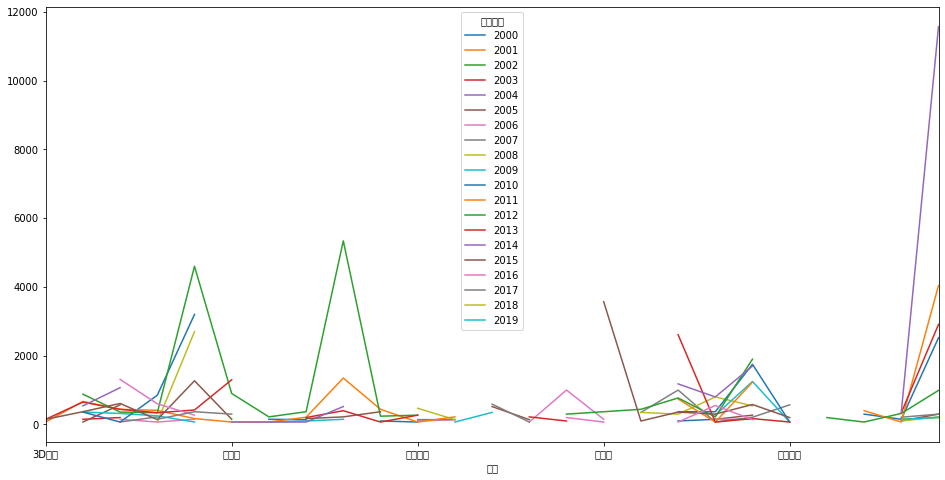

In [79]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Songti SC']
data_pivot.plot(figsize=(16,8))